In [1]:
from geo_func import *

In [26]:
data = gpd.read_file('geometry_data/VNM_adm3.shp')
data = gpd.GeoDataFrame(data, crs='WGS84')
data.head(2)

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,ID_3,NAME_3,CCN_3,CCA_3,TYPE_3,ENGTYPE_3,NL_NAME_3,VARNAME_3,geometry
0,250,VNM,Vietnam,1,Đà Nẵng,1,Cẩm Lệ,1,Hòa Phát,0,None,Commune,Commune,None,None,"POLYGON ((108.17028 16.01591, 108.16991 16.016..."
1,250,VNM,Vietnam,1,Đà Nẵng,1,Cẩm Lệ,2,Hòa Xuân,0,None,Commune,Commune,None,None,"POLYGON ((108.20899 15.99559, 108.21204 15.999..."


In [2]:
data = read_geopandas_data()
data

5485    POLYGON ((108.49611 11.96060, 108.49569 11.960...
Name: geometry, dtype: geometry

In [7]:
side_length=0.025
data.envelope

5485    POLYGON ((108.46599 11.95429, 108.50732 11.954...
dtype: geometry

In [18]:
data.bounds

,minx,miny,maxx,maxy
5485,108.465988,11.954291,108.507317,11.992592


In [31]:
x1, y1, x2, y2 = data.bounds.iloc[0]
width = x2 - x1
height = y2 - y1
x1, y1, x2, y2

(108.4659881591798, 11.954291343689022, 108.50731658935553, 11.992591857910156)

In [32]:
xcells = int(np.round(width / side_length))
ycells = int(np.round(height / side_length))
xcells, ycells

(2, 2)

In [33]:
yindices = np.linspace(y1, y2, ycells + 1)
xindices = np.linspace(x1, x2, xcells + 1)
xindices,yindices

(array([108.46598816, 108.48665237, 108.50731659]),
 array([11.95429134, 11.9734416 , 11.99259186]))

In [34]:
horizontal_splitters = [
        LineString([(x, yindices[0]), (x, yindices[-1])]) for x in xindices
    ]
vertical_splitters = [
    LineString([(xindices[0], y), (xindices[-1], y)]) for y in yindices
]
horizontal_splitters, vertical_splitters

([<LINESTRING (108.466 11.954, 108.466 11.993)>,
  <LINESTRING (108.487 11.954, 108.487 11.993)>,
  <LINESTRING (108.507 11.954, 108.507 11.993)>],
 [<LINESTRING (108.466 11.954, 108.507 11.954)>,
  <LINESTRING (108.466 11.973, 108.507 11.973)>,
  <LINESTRING (108.466 11.993, 108.507 11.993)>])

In [37]:
result = data
for splitter in vertical_splitters:
    result = MultiPolygon(split(result, splitter))
result

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

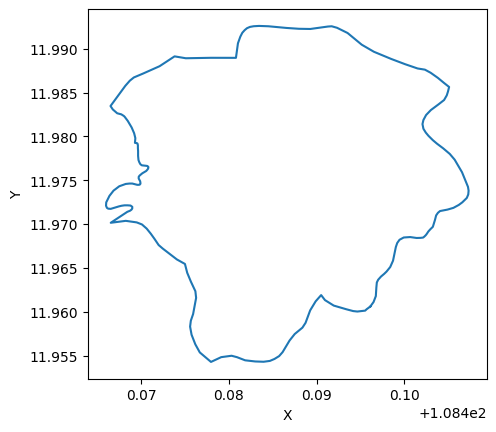

In [23]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

coordinates = data.iloc[0].exterior.coords
x_coordinates, y_coordinates = zip(*coordinates)
fig, ax = plt.subplots()
ax.plot(x_coordinates, y_coordinates)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_aspect('equal')
plt.show()

In [27]:
get_squares_from_rect

<function geo_func.get_squares_from_rect(RectangularPolygon, side_length=0.0025)>